# Fourier Transforms with Numpy

*Author*: Marc-Antonio Bisotti

*Date*: 20 Feb 2013

*Purpose*: Review properties of Fourier transforms

*Update*: Revised 10 Feb 2014, HF

In [1]:
import numpy as np
from math import pi
from finmag.util.plot_helpers import surface_2d, surface_3d
import pylab

[2017-03-28 22:12:08] INFO: Finmag logging output will be appended to file: '/home/weiwei/.finmag/global.log'
[2017-03-28 22:12:08] DEBUG: Building modules in 'native'...
[2017-03-28 22:12:08] DEBUG: FinMag          d750b581d158c0a7dc650cf146ba758bca12e9f6
[2017-03-28 22:12:08] DEBUG: Dolfin          2016.2.0             Matplotlib      1.5.1               
[2017-03-28 22:12:08] DEBUG: Numpy           1.11.0               Scipy           0.17.0              
[2017-03-28 22:12:08] DEBUG: IPython         5.0.0                Python          2.7.12              
[2017-03-28 22:12:08] DEBUG: Paraview        5.0.1+dfsg1-4        Sundials        2.5.0               
[2017-03-28 22:12:08] DEBUG: Boost-Python    <unknown>            Linux           Ubuntu 16.04.2 LTS  
[2017-03-28 22:12:08] DEBUG: Registering debug signal handler. Press Ctrl-Z any time to stop execution and jump into the debugger.


## 1D Fourier Transform

### Of Gaussian Function

Let's start by defining and plotting a simple "bell curve".

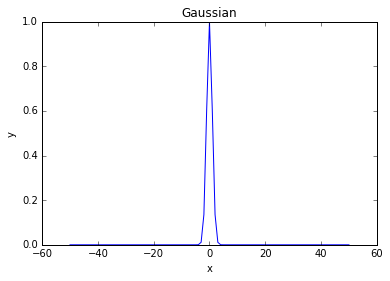

In [2]:
%matplotlib inline

from pylab import title, xlabel, ylabel, plot, legend

def bell_curve(xs, a=1.0, b=0.0, c=1.0):
    """
    Return bell curve with height a, position of centre b
    and c is related to the FWHM.

    """
    return a * np.exp(- (xs - b)**2 / (2 * c**2))

dx = 1
x = np.arange(-50, 51, dx)
y = bell_curve(x, c=1.0)

title("Gaussian")
xlabel("x")
ylabel("y")
plot(x, y)

The Fourier transform is computed with numpy.fft.fft.

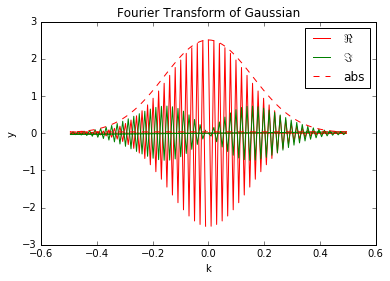

In [3]:
k = np.fft.fftfreq(len(x), d=dx)
yk = np.fft.fft(y)

title("Fourier Transform of Gaussian")
xlabel("k")
ylabel("y")
plot(k, np.real(yk), 'r', label="$\Re$")
plot(k, np.imag(yk), 'g', label="$\Im$")
plot(k, np.abs(yk), 'r--', label="abs")
legend()

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


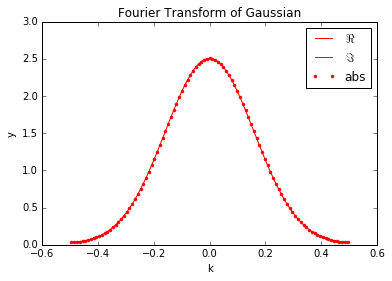

In [4]:
k = np.fft.fftfreq(len(x), d=dx)
yk = np.fft.fft(np.fft.ifftshift(y))
k = np.fft.fftshift(k)
yk = np.fft.fftshift(yk)
"""
Weiwei [28 Mar, 2017]: the fouier transform of a 'bell curve' should be a 'bell curve' without oscillation,  
however, the above figure shows oscillation. It seems this could be fixed by using  
   np.fft.fft(np.fft.ifftshift(y)) rather than np.fft.fft(y).
So does this mean that we should use ifftshift first in general?
"""

title("Fourier Transform of Gaussian")
xlabel("k")
ylabel("y")
plot(k, np.real(yk), 'r', label="$\Re$")
plot(k, np.imag(yk), 'g', label="$\Im$")
plot(k, np.abs(yk), 'r.', label="abs")
legend()
print np.imag(yk)

We can see that the absolute value of the transform contains the data we expect.

Let's try to plot both curves in one plot.

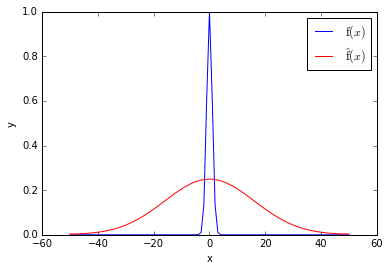

In [5]:
xlabel("x")
ylabel("y")
plot(x, y, "b", label="$\mathrm{f}(x)$")
plot(x, np.abs(yk)/np.sqrt(len(x)), "r", label="$\hat{\mathrm{f}}(x)$")
legend()

That doesn't look right. The problem is that numpy.fft.fft's results are in so-called standard-order: First the zero-frequency term, then the positive frequency terms and finally the negative frequency terms. The function numpy.fft.fftshift puts the zero-frequency in the middle.

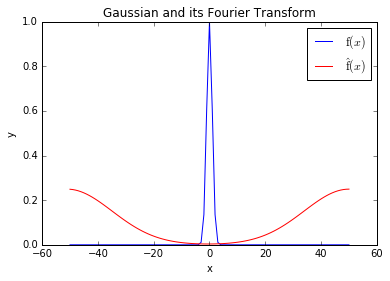

In [6]:
xlabel("x")
ylabel("y")
plot(x, y, "b", label="$\mathrm{f}(x)$")
plot(x, np.fft.fftshift(np.abs(yk))/np.sqrt(len(x)), "r", label="$\hat{\mathrm{f}}(x)$")
legend()
title("Gaussian and its Fourier Transform")

By playing with the variable c which controls the width of the initial gaussian, you can see the uncertainty principle in action: The more concentrated the function, the more its Fourier transform is spread out and vice-versa.

### Of Magnetisation Rotation

Let's imagine a magnetisation vector rotating about the $z$-axis in a clockwise direction. The plot of $m_\mathrm{x}$ is a cosine wave.

What's the frequency of the rotation?

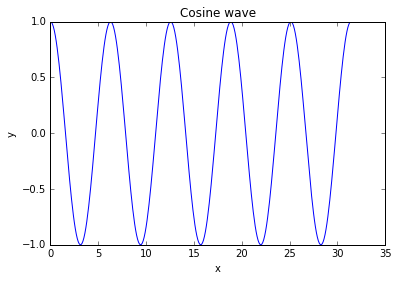

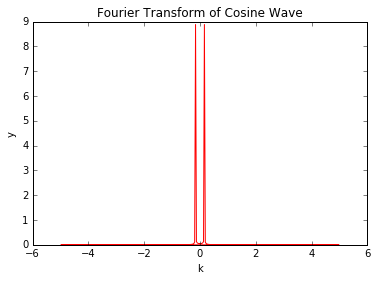

In [7]:
dx = 0.1
x = np.arange(0, 10 * pi, dx)
y = np.cos(x)

k = np.fft.fftfreq(len(x), d=dx)
yk = np.fft.fft(y)

xlabel("x")
ylabel("y")
plot(x, y, "b")
title("Cosine wave")
pylab.show()

xlabel("k")
ylabel("y")
plot(k, np.abs(yk)/np.sqrt(len(x)), "r")
title("Fourier Transform of Cosine Wave")

The Fourier Transform can't distinguish between a positive vector rotating with a positive frequency and a negative vector rotating with a negative frequency.

The solution is to input both $m_\mathrm{x}$ and $m_\mathrm{y}$ into the Fourier Transform. The plot of $m_\mathrm{y}$ is a sine wave and the Fourier Transform is designed to handle two orthogonal input functions. The $m_\mathrm{y}$ will become the imaginary part of the input.

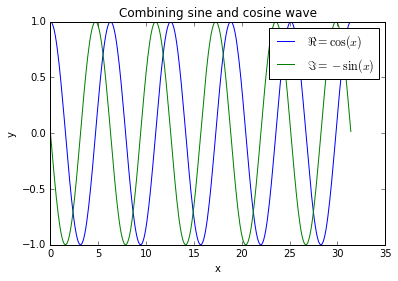

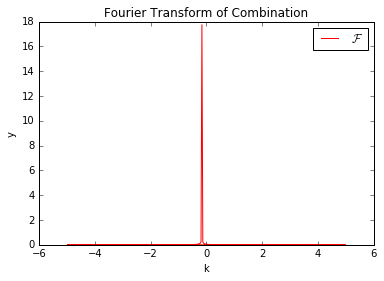

In [8]:
y_real = np.cos(x)
y_imag = - np.sin(x)
y = y_real + 1j * y_imag

k = np.fft.fftfreq(len(x), d=dx)
yk = np.abs(np.fft.fft(y)) / np.sqrt(len(x))

xlabel("x")
ylabel("y")
plot(x, y_real, "b", label="$\Re=\cos(x)$")
plot(x, y_imag, "g", label="$\Im=-\sin(x)$")
legend()
title("Combining sine and cosine wave")

pylab.figure()

xlabel("k")
ylabel("y")
plot(k, yk, "r", label="$\mathcal{F}$")
legend()
title("Fourier Transform of Combination")

We find that the frequency is:



In [9]:
freq = k[np.argmax(yk)]
print freq

-0.15873015873


Which corresponds to an angular frequency of

In [10]:
angular_frequency = 2 * pi * freq
print angular_frequency

-0.99733100114


Which is indeed one revolution per second in negative (clockwise) direction.

## 2D Fourier Transform

The Fourier transformation can be generalised to higher dimensions. The signals we will deal with are functions over 2D space, resulting of the probing of one component of the magnetisation along an axis over time.

In [11]:
xs = np.linspace(0, 600, 201); dx = abs(xs[1] - xs[0])
ts = np.linspace(0, 100, 101); dt = abs(ts[1] - ts[0])
print "Number of space values: {}. Spacing: {}.".format(len(xs), dx)
print "Number of time values: {}. Spacing: {}.".format(len(ts), dt)

Number of space values: 201. Spacing: 3.0.
Number of time values: 101. Spacing: 1.0.


This is our fake magnetisation data.

In [12]:
my = np.zeros((len(ts), len(xs)))

for t in ts:
    my[t][:] = t * np.sin(2 * pi * 3 * xs/abs(np.min(xs)-np.max(xs))) / 1e3
    
print "Shape of array: {}.".format(my.shape)
print "Minimum: {}, Maximum: {}.".format(np.min(my), np.max(my))

Shape of array: (101, 201).
Minimum: -0.1, Maximum: 0.1.


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


It can be plotted in real space.

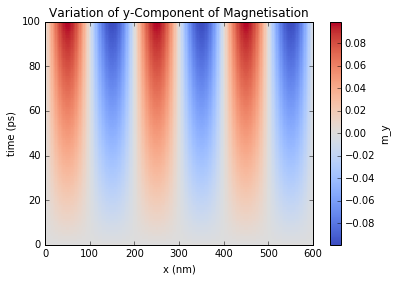

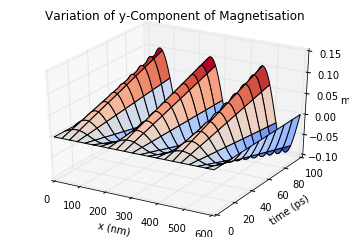

In [13]:
headline = "Variation of y-Component of Magnetisation"
labels = ("x (nm)", "time (ps)", "m_y")

surface_2d(xs, ts, my, labels, headline)
surface_3d(xs, ts, my, labels, headline)

The Fourier Transform in 2D is computed with numpy.fft.fft2. The Fourier transform is a function of complex variables. Its spectrum is $F(u, v) = R(u, v) + i I(u, v)$

The Amplitude Spectrum is $|F(u,v)| = \sqrt{R^2(u,v) + I^2(u,v)}$

We are mainly interested in the logarithm of the Power Spectrum $P(u,v) = |F(u, v)|^2 = R^2(u,v) + I^2(u,v)$

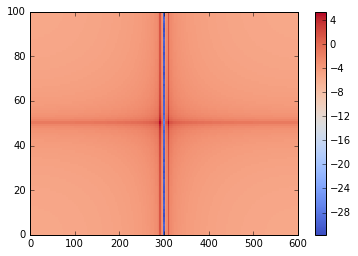

In [14]:
F = np.fft.fftshift(np.fft.fft2(my)) # Fourier
P = np.power(np.abs(F), 2)           # power spectrum
log_P = np.log10(P)                  # log power spectrum

surface_2d(xs, ts, log_P)

We can also get the spatial and temporal frequencies with numpy.fft.fftfreq. Since we expressed the points in time in picoseconds ($10^{-12}\mathrm{s}$) and we'd like temporal frequencies in GHz (= $10^{9}\mathrm{s}^{-1}$) we multiply by 1000.

In [15]:
frequency = 1e3 * np.fft.fftshift(np.fft.fftfreq(len(ts), dt))
wavenumber = np.fft.fftshift(np.fft.fftfreq(len(xs), dx))

And we can finally plot the dispersion relation.

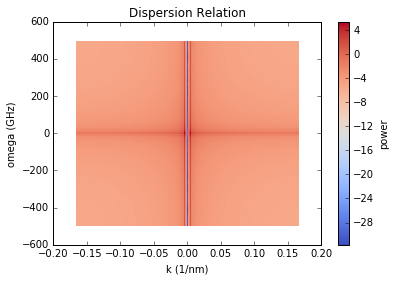

In [16]:
surface_2d(wavenumber, frequency, log_P, ("k (1/nm)", "omega (GHz)", "power"), "Dispersion Relation")